In [1]:
# mike babb
# 2022 03 03
# import and format data

In [2]:
# standard
import pickle
import os
from string import ascii_lowercase

In [3]:
# external
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [4]:
vowels = ['a','e', 'i', 'o', 'u', 'y']

In [5]:
# import the data
df = pd.read_csv(filepath_or_buffer='words5.csv', header = None, names = ['word'])

In [6]:
df.head()

,word
0,aalii
1,Aaron
2,abaca
3,aback
4,abaff


In [7]:
# make everything lowercase
df['lcase'] = df['word'].str.lower()

In [8]:
df.head()

,word,lcase
0,aalii,aalii
1,Aaron,aaron
2,abaca,abaca
3,aback,aback
4,abaff,abaff


In [9]:
# let's sort, and then create an ID
df = df.sort_values(by = ['lcase', 'word'])

In [10]:
df['word_id'] = df.index

In [11]:
df.head()

,word,lcase,word_id
0,aalii,aalii,0
1,Aaron,aaron,1
2,abaca,abaca,2
3,aback,aback,3
4,abaff,abaff,4


In [12]:
# now, we need to create a matrix that we will use to "score" each word

In [13]:
df.shape

(9972, 3)

In [14]:
char_matrix = np.zeros(shape = (len(df), 26))

In [15]:
# we will also need a dictionary that tracks the position of each letter
letter_dict = {l:p for p, l in enumerate(ascii_lowercase)}

In [16]:
# now, we need to enumerate each row in the df and populate the matrix
# the id of the word corresponds to the word
def pop_matrix(row):
    curr_index = row['word_id']
    curr_word = row['lcase']
    for i_cl, cl in enumerate(curr_word):
        # use our dicationary
        char_matrix[curr_index, letter_dict[cl]] += 1
        
    return None

In [17]:
output = df.apply(pop_matrix, 1)

In [18]:
char_matrix

array([[2., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [3., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [19]:
# row sum to check!
rs_check = char_matrix.sum(1)

In [20]:
# okay! now... figure out how many words have each letter?
# do a sum
letter_count = char_matrix.sum(0)

In [21]:
# should be 26!
letter_count.shape

(26,)

In [22]:
(letter_count / letter_count.sum()) * 100

array([11.28559968,  2.67950261,  3.59406338,  3.28920979,  9.62896109,
        1.45206578,  2.52908143,  3.10870437,  6.49418371,  0.46730846,
        2.15403129,  5.45326915,  3.16887284,  5.39711191,  6.4921781 ,
        2.9081428 ,  0.19655034,  6.93943041,  5.64380265,  5.33894906,
        4.540714  ,  1.08503811,  1.48415564,  0.46730846,  3.58804653,
        0.61371841])

In [23]:
# put each one of these value in a dictionary
letter_rank_dict = {l:lr for l, lr in zip(ascii_lowercase, letter_count)}

In [24]:
letter_rank_dict

{'a': 5627.0,
 'b': 1336.0,
 'c': 1792.0,
 'd': 1640.0,
 'e': 4801.0,
 'f': 724.0,
 'g': 1261.0,
 'h': 1550.0,
 'i': 3238.0,
 'j': 233.0,
 'k': 1074.0,
 'l': 2719.0,
 'm': 1580.0,
 'n': 2691.0,
 'o': 3237.0,
 'p': 1450.0,
 'q': 98.0,
 'r': 3460.0,
 's': 2814.0,
 't': 2662.0,
 'u': 2264.0,
 'v': 541.0,
 'w': 740.0,
 'x': 233.0,
 'y': 1789.0,
 'z': 306.0}

In [25]:
letter_rank_df = pd.DataFrame.from_dict(data = letter_rank_dict, orient = 'index', 
                                       columns = ['score']).reset_index()

In [26]:
letter_rank_df.head()

,index,score
0,a,5627.0
1,b,1336.0
2,c,1792.0
3,d,1640.0
4,e,4801.0


In [27]:
letter_rank_df.columns = ['letter', 'score']

In [28]:
letter_rank_df['score_percent'] = letter_rank_df['score']* 100 / letter_rank_df['score'].sum()

In [29]:
letter_rank_df.head()

,letter,score,score_percent
0,a,5627.0,11.285600
1,b,1336.0,2.679503
2,c,1792.0,3.594063
3,d,1640.0,3.289210
4,e,4801.0,9.628961


In [30]:
letter_rank_df['score_percent'].describe()

count    26.000000
mean      3.846154
std       2.807963
min       0.196550
25%       1.651625
50%       3.229041
75%       5.439230
max      11.285600
Name: score_percent, dtype: float64

In [31]:
letter_rank_df['is_vowel'] = int(0)

In [32]:
letter_rank_df['colors'] = 'black'

In [33]:
letter_rank_df.loc[letter_rank_df['letter'].isin(vowels), 'colors'] = 'red'

In [34]:
vowels = ['a', 'e', 'i', 'o', 'u', 'y']
letter_rank_df.loc[letter_rank_df['letter'].isin(vowels), 'is_vowel'] = 1

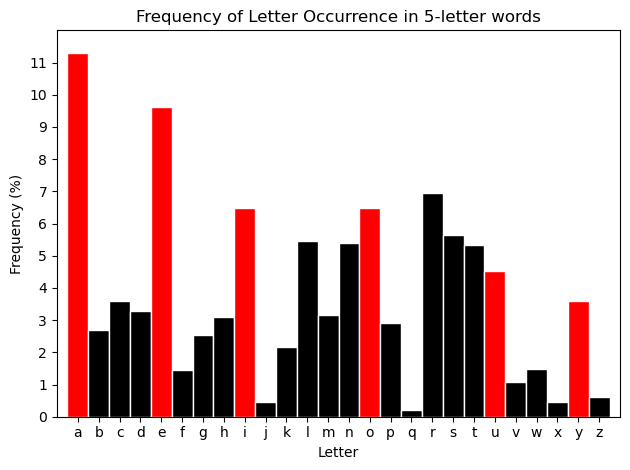

In [35]:
# plot
#plt.style.use('_mpl-gallery')
%matplotlib inline 
fig, ax = plt.subplots(tight_layout = True)

ax.bar(x=letter_rank_df['letter'], height=letter_rank_df['score_percent'],
       width=1, edgecolor="white", linewidth=1, color = letter_rank_df['colors'])

ax.set(xlim=(-1, 26), xticks=np.arange(0, 26),
       ylim=(0, 12), yticks=np.arange(0, 12))
ax.set_title('Frequency of Letter Occurrence in 5-letter words')
ax.set_xlabel('Letter')
ax.set_ylabel('Frequency (%)')

plt.savefig(fname = 'letter_score.png', format = 'png',
            dpi=96, pad_inches = .5, facecolor='white')
#plt.show()

In [36]:
letter_rank_df = letter_rank_df.sort_values(by = 'score', ascending=False)

In [37]:
letter_rank_df.head(10)

,letter,score,score_percent,is_vowel,colors
0,a,5627.0,11.285600,1,red
4,e,4801.0,9.628961,1,red
17,r,3460.0,6.939430,0,black
8,i,3238.0,6.494184,1,red
14,o,3237.0,6.492178,1,red
18,s,2814.0,5.643803,0,black
11,l,2719.0,5.453269,0,black
13,n,2691.0,5.397112,0,black
19,t,2662.0,5.338949,0,black
20,u,2264.0,4.540714,1,red


In [38]:
# now, score each word
df['n_unique_chars'] = df['lcase'].map(lambda x: len(set(x)))

In [39]:
# now, add each letter.
def sum_letters(x):
    curr_score = 0
    for l in x:
        curr_score += letter_rank_dict[l]
    
    return curr_score

In [40]:
df['word_score'] = df['lcase'].map(sum_letters)

In [41]:
df.head()

,word,lcase,word_id,n_unique_chars,word_score
0,aalii,aalii,0,3,20449.0
1,Aaron,aaron,1,4,20642.0
2,abaca,abaca,2,3,20009.0
3,aback,aback,3,4,15456.0
4,abaff,abaff,4,3,14038.0


In [42]:
sorted('bat')

['a', 'b', 't']

In [43]:
# identify the word group
df['word_group'] = df['lcase'].map(lambda x: hash(tuple(sorted(x))))

In [44]:
# now, sort
wdf = df.sort_values(by = ['n_unique_chars', 'word_score'], ascending = False)

In [45]:
wdf.head()

,word,lcase,word_id,n_unique_chars,word_score,word_group
568,Aries,aries,568,5,19940.0,-7593473510551836896
572,arise,arise,572,5,19940.0,-7593473510551836896
6726,raise,raise,6726,5,19940.0,-7593473510551836896
7430,serai,serai,7430,5,19940.0,-7593473510551836896
592,arose,arose,592,5,19939.0,7873129116485683232


In [46]:
wg_df = wdf.loc[wdf['n_unique_chars'] == 5, ['word_group', 'word_score']].drop_duplicates()

In [47]:
wg_df = wg_df.sort_values(by = ['word_score'], ascending = False )

In [48]:
top_five_wg = wg_df['word_group'].iloc[:10]

In [49]:
top_five_wg

568    -7593473510551836896
592     7873129116485683232
567    -4000815792010694652
4834   -9043404346120419233
2852    6939566469899293687
574     3352182351503917293
5955    4770398287816253933
578    -4349918319594474227
472    -8055553736132489469
657     5444102255463468359
Name: word_group, dtype: int64

In [50]:
for wg in top_five_wg:
    #print(wg)
    curr_word = wdf.loc[wdf['word_group']==wg, 'lcase'].tolist()
    print(curr_word)
    

['aries', 'arise', 'raise', 'serai']
['arose', 'oreas']
['ariel']
['leora']
['erian', 'irena', 'reina']
['arite', 'artie', 'irate', 'retia', 'tarie']
['orate']
['arles', 'arsle', 'laser', 'seral', 'slare']
['anser', 'nares', 'rasen', 'snare']
['aster', 'serta', 'stare', 'strae', 'tarse', 'teras']


In [51]:
wg_df.head()

,word_group,word_score
568,-7593473510551836896,19940.0
592,7873129116485683232,19939.0
567,-4000815792010694652,19845.0
4834,-9043404346120419233,19844.0
2852,6939566469899293687,19817.0


In [52]:
wg_df.head()

,word_group,word_score
568,-7593473510551836896,19940.0
592,7873129116485683232,19939.0
567,-4000815792010694652,19845.0
4834,-9043404346120419233,19844.0
2852,6939566469899293687,19817.0


In [53]:
# aries, arise, raise, and serai are the best words to start with

In [54]:
# save this stuff
# the df, the letter dictionary, the char_matrix, and the letter_dict_Rank

In [55]:
df.to_pickle(path = 'word_df.pkl')

In [56]:
with open('letter_dict.pkl', 'wb') as handle:
    pickle.dump(letter_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [57]:
with open('char_matrix.pkl', 'wb') as handle:
    pickle.dump(char_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [58]:
with open('letter_rank_dict.pkl', 'wb') as handle:
    pickle.dump(letter_rank_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [59]:
# now, let's try this another way: count the letters in each position
letter_matrix = np.zeros(shape = (26, 5))

In [60]:
def pop_letter_matrix(x):
    
    for i_ll, ll in enumerate(x):
        # row, then columns
        letter_matrix[letter_dict[ll], i_ll] += 1
        
    return None  

In [61]:
output = df['lcase'].map(pop_letter_matrix)

In [62]:
letter_matrix.shape

(26, 5)

In [63]:
# now, we use the which max to find the index of the most common letter
# this will tell us highest ranked position of each letter across all letters
output = np.argmax(a = letter_matrix, axis = 1)

In [64]:
output

array([1, 0, 0, 4, 4, 0, 0, 1, 1, 0, 4, 2, 0, 2, 1, 0, 0, 2, 0, 4, 1, 2,
       0, 4, 4, 3], dtype=int64)